In [1]:
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

from focal_spot_pattern import create_gaussian_mask
from propagation import fraunhofer_propagation

In [2]:
grid_dimension = 500
lambda_ = 2.75e-10
I0 = 1e6
w = 10e-6

In [3]:
N_F = [1e-6, 1e-4, 1e-2, 4]

## Simple case - beam passing through square aperture

In [4]:
# known case from LightPipes

grid_size = 0.4
lambda_ = 1e-6
grid_dimension = 512

w=0.01
z = 500

In [5]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.RectAperture(2*w, 2*w, 0, F_in)

x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
X,Y = np.meshgrid(x,y)

E_in = np.ones([grid_dimension, grid_dimension], dtype=np.complex128)
E_in[X<=-w] = 0 +0j
E_in[X>=w] = 0 +0j
E_in[Y<=-w] = 0 +0j
E_in[Y>=w] = 0 +0j

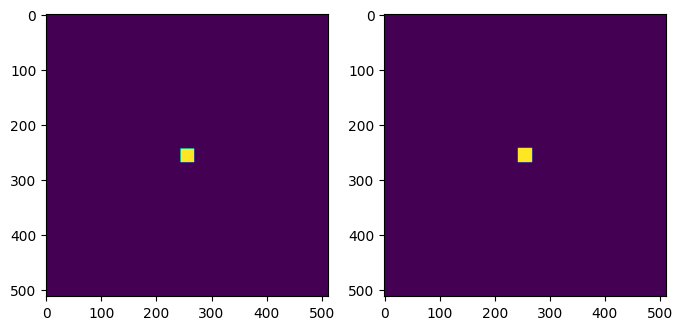

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

ax[0].imshow(np.abs(F_in.field)**2)
ax[1].imshow(np.abs(E_in)**2)

In [7]:
F_out = lp.Forvard(z, F_in)
E_out = fraunhofer_propagation(E_in, lambda_, z, grid_size/grid_dimension)

0.5495169560987042
0.6311457894746144


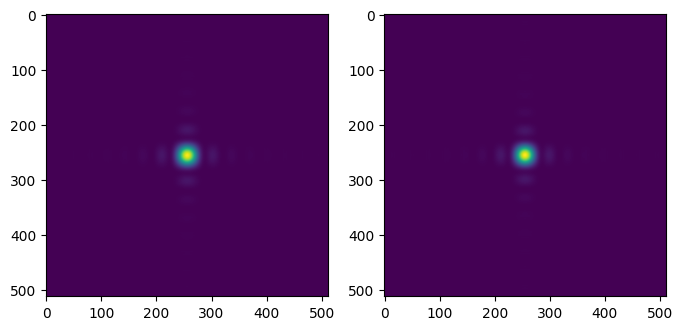

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

ax[0].imshow(np.abs(F_out.field)**2)
ax[1].imshow(np.abs(E_out)**2)

print(np.max(np.abs(F_out.field)**2))
print(np.max(np.abs(E_out)**2))

In [9]:
print(np.sum(np.abs(F_in.field)**2))
print(np.sum(np.abs(F_out.field)**2))

print(np.sum(np.abs(E_in)**2))
print(np.sum(np.abs(E_out)**2))

625.0
625.0000000000002
676.0
676.0000000000002


In [10]:
F_in = []
E_in = []

F_out = []
E_out = []

for n in N_F:
    z = w*w/(lambda_*n)
    print(z)
    grid_size = 15*w

    f_in = lp.Begin(grid_size, lambda_, grid_dimension)
    f_in = lp.RectAperture(2*w, 2*w, 0, f_in)
    F_in.append(f_in)

    x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    X,Y = np.meshgrid(x,y)

    e_in = np.ones([grid_dimension,grid_dimension], dtype = np.complex128)
    e_in[X<=-w] = 0 +0j
    e_in[X>=w] = 0 +0j
    e_in[Y<=-w] = 0 +0j
    e_in[Y>=w] = 0 +0j

    E_in.append(e_in)

    F_out.append(lp.Forvard(f_in, z))
    E_out.append(fraunhofer_propagation(e_in, lambda_, z, grid_size/grid_dimension))

100000000.0
1000000.0
10000.0
25.000000000000004


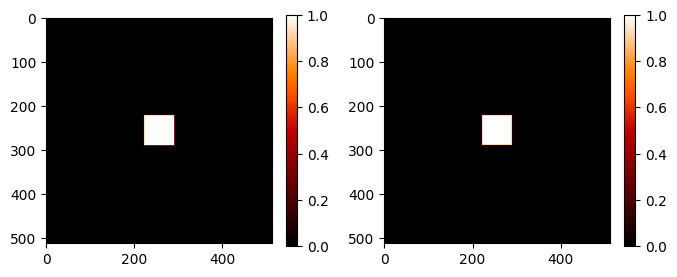

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(f_in.field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(e_in)**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

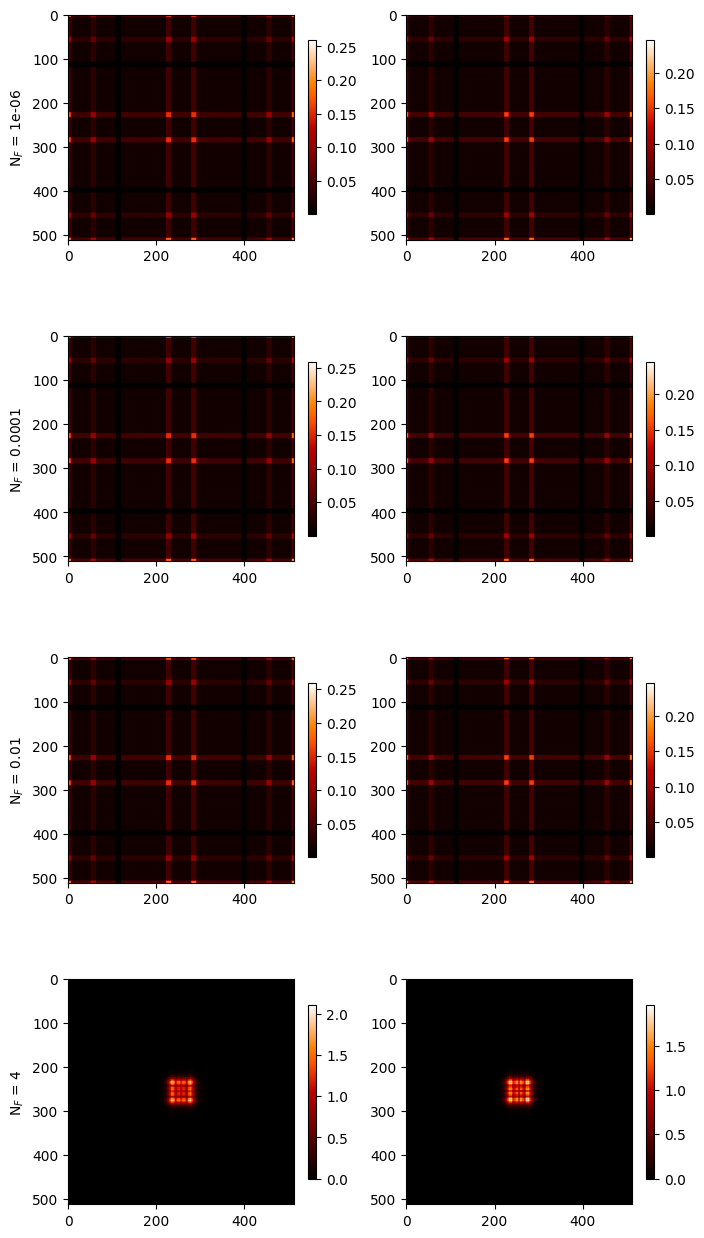

In [12]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.abs(F_out[i].field)**2, cmap='gist_heat')
    im2=ax[i][1].imshow(np.abs(E_out[i])**2, cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

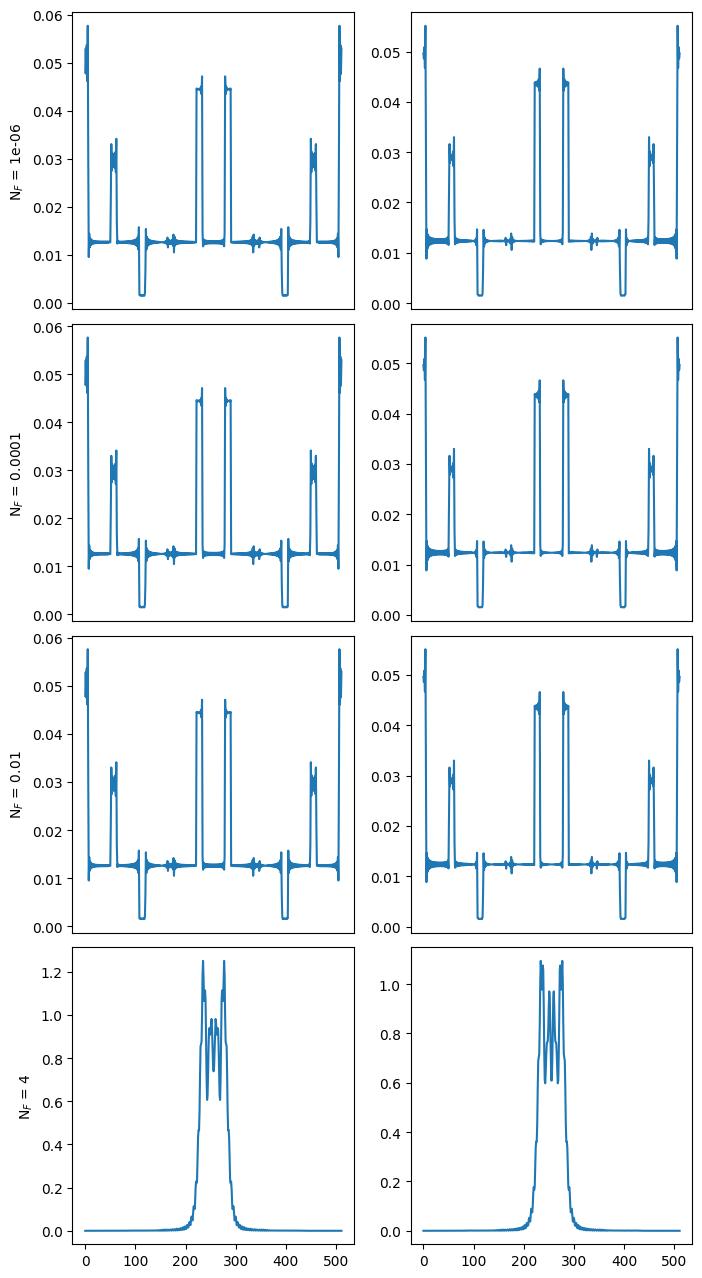

In [13]:
# cross section plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    ax[i][0].plot(np.abs(F_out[i].field[int(len(F_out[i].field)/2)])**2)
    ax[i][1].plot(np.abs(E_out[i][int(len(E_out[i])/2)])**2)
    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[2][0].set_xticks([])
ax[2][1].set_xticks([])

fig.subplots_adjust(hspace=0.05)

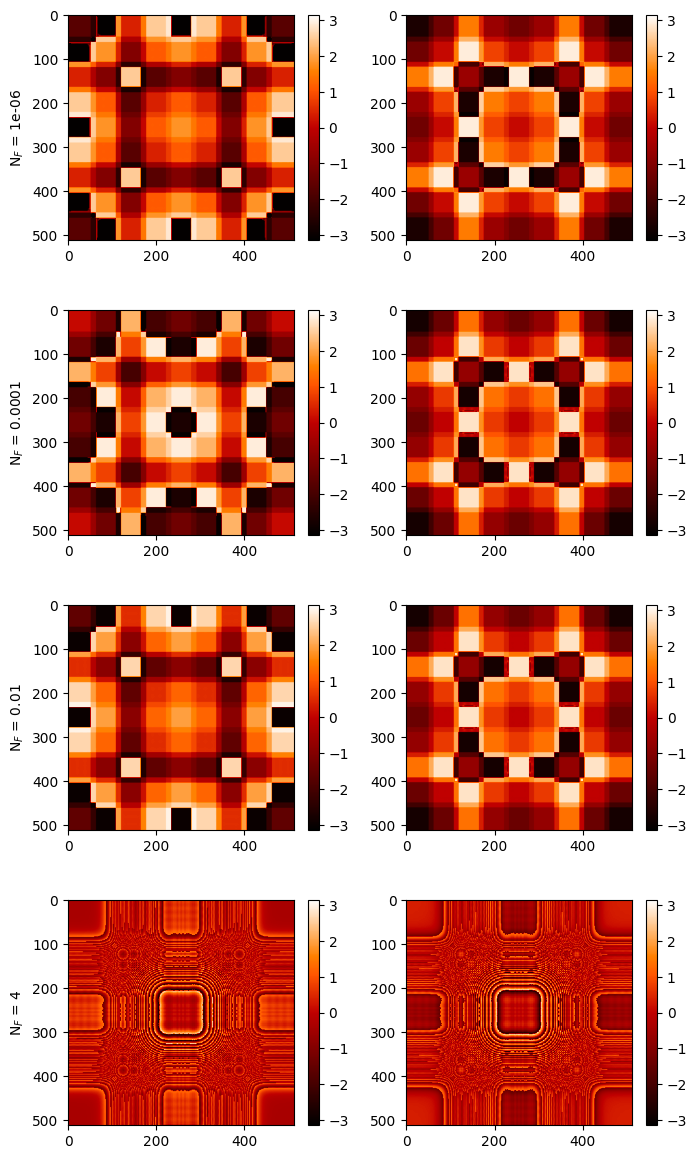

In [14]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.angle(F_out[i].field), cmap='gist_heat')
    im2=ax[i][1].imshow(np.angle(E_out[i]), cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

In [15]:
# numerical comparison on number of photons

print("LightPipes comparison:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(F_in[i].field)**2), "| out =", np.sum(np.abs(F_out[i].field)**2))

print("\nCustom method:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(E_in[i])**2), "| out =", np.sum(np.abs(E_out[i])**2))

LightPipes comparison:
N_F = 1e-06 | in = 4761.0 | out = 4761.000000000002
N_F = 0.0001 | in = 4761.0 | out = 4761.000000000002
N_F = 0.01 | in = 4761.0 | out = 4761.000000000001
N_F = 4 | in = 4761.0 | out = 4761.000000000001

Custom method:
N_F = 1e-06 | in = 4624.0 | out = 4624.000000000001
N_F = 0.0001 | in = 4624.0 | out = 4624.000000000001
N_F = 0.01 | in = 4624.0 | out = 4624.000000000002
N_F = 4 | in = 4624.0 | out = 4624.000000000005


## Simple case - beam passing through circle aperture

In [22]:
F_in = []
E_in = []

F_out = []
E_out = []

for n in N_F:
    z = w*w/(lambda_*n)
    print(z)
    grid_size = 15*w

    f_in = lp.Begin(grid_size, lambda_, grid_dimension)
    f_in = lp.CircAperture(w, 0, 0, f_in)
    F_in.append(f_in)

    x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    X,Y = np.meshgrid(x,y)

    e_in = np.ones([grid_dimension,grid_dimension], dtype = np.complex128)
    e_in [np.sqrt(X**2 + Y**2) > w] = 0 +0j
    E_in.append(e_in)

    F_out.append(lp.Forvard(f_in, z))
    E_out.append(fraunhofer_propagation(e_in, lambda_, z, grid_size/grid_dimension))

100000000.0
1000000.0
10000.0
25.000000000000004


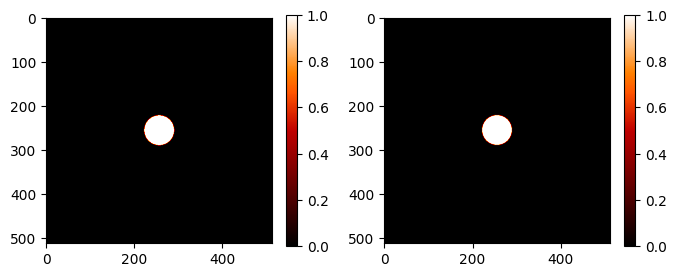

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in[0].field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_in[0])**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

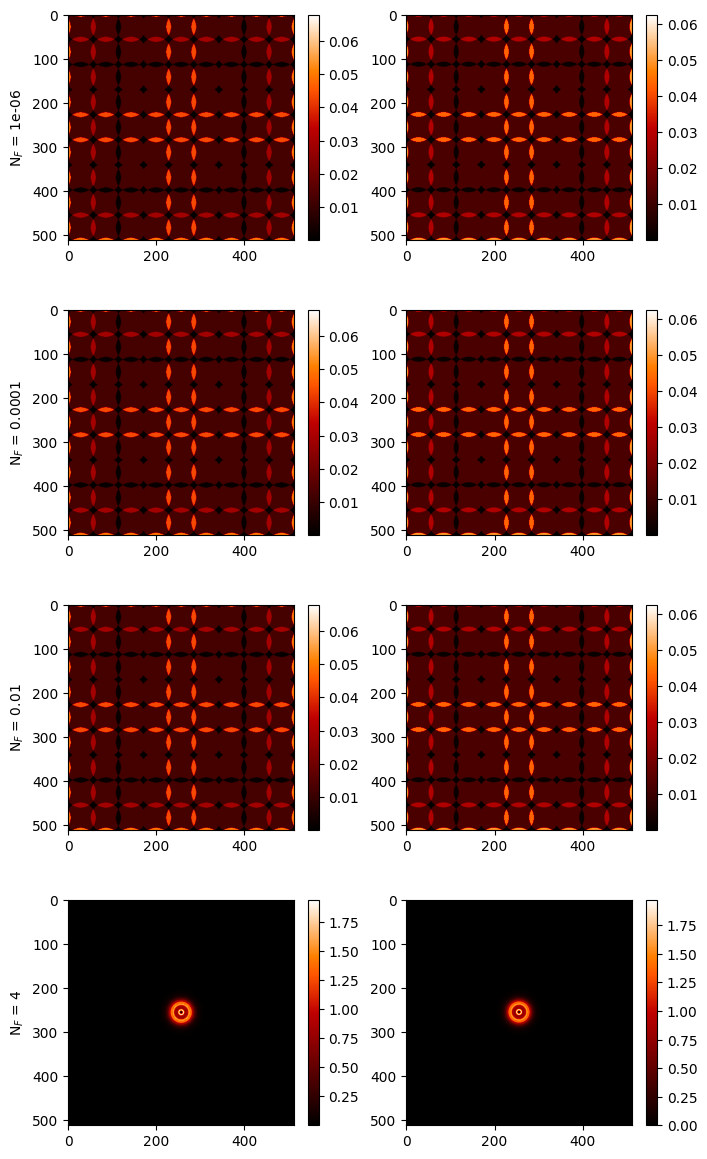

In [24]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.abs(F_out[i].field)**2, cmap='gist_heat')
    im2=ax[i][1].imshow(np.abs(E_out[i])**2, cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

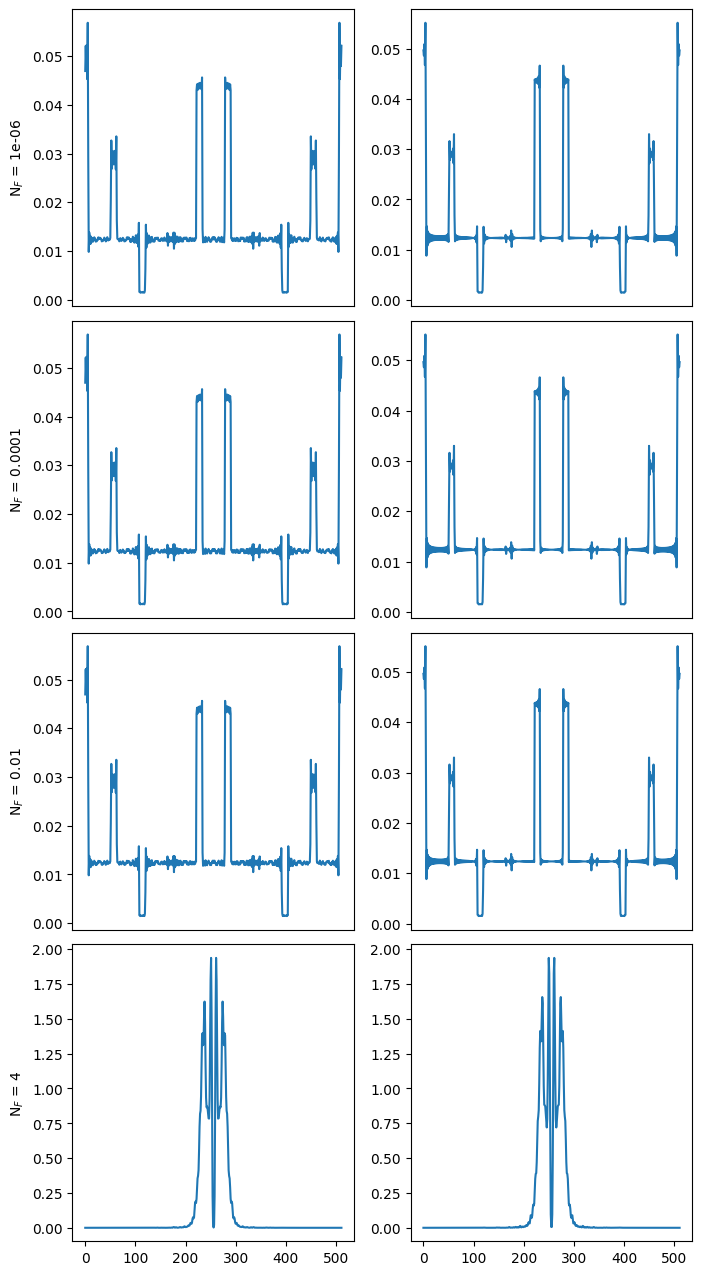

In [25]:
# cross section plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    ax[i][0].plot(np.abs(F_out[i].field[int(len(F_out[i].field)/2)])**2)
    ax[i][1].plot(np.abs(E_out[i][int(len(E_out[i])/2)])**2)
    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[2][0].set_xticks([])
ax[2][1].set_xticks([])

fig.subplots_adjust(hspace=0.05)

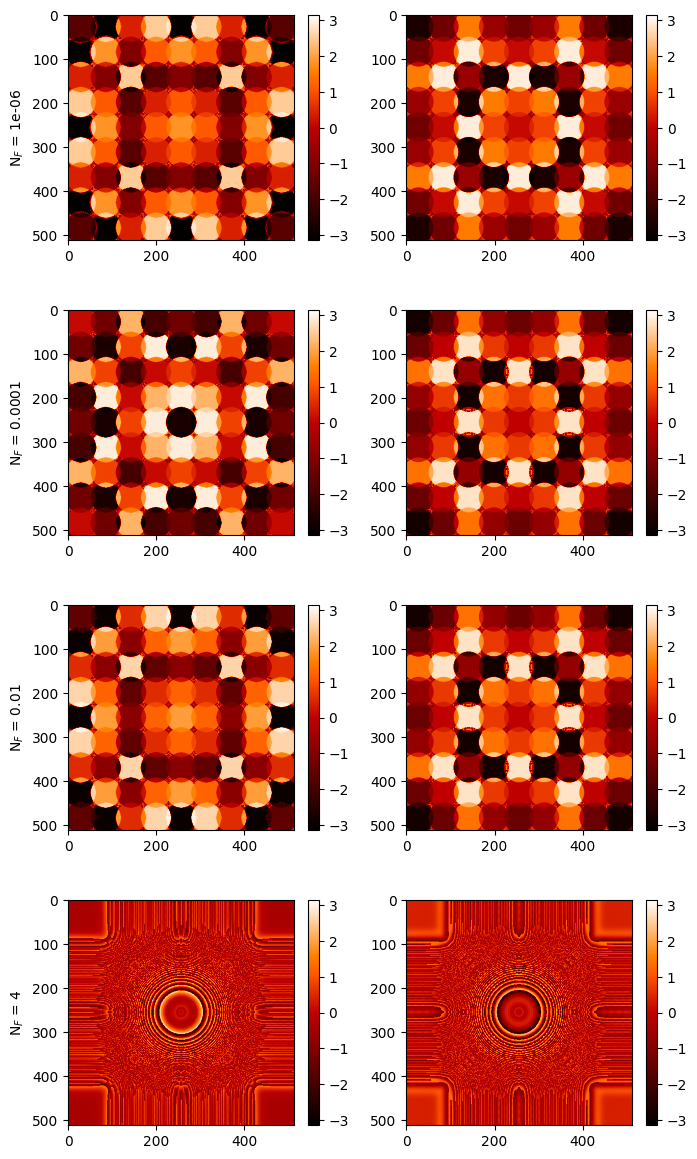

In [26]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.angle(F_out[i].field), cmap='gist_heat')
    im2=ax[i][1].imshow(np.angle(E_out[i]), cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

In [27]:
# numerical comparison on number of photons

print("LightPipes comparison:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(F_in[i].field)**2), "| out =", np.sum(np.abs(F_out[i].field)**2))

print("\nCustom method:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(E_in[i])**2), "| out =", np.sum(np.abs(E_out[i])**2))

LightPipes comparison:
N_F = 1e-06 | in = 3673.0 | out = 3673.000000000001
N_F = 0.0001 | in = 3673.0 | out = 3673.000000000002
N_F = 0.01 | in = 3673.0 | out = 3673.000000000001
N_F = 4 | in = 3673.0 | out = 3673.0000000000014

Custom method:
N_F = 1e-06 | in = 3648.0 | out = 3648.0000000000005
N_F = 0.0001 | in = 3648.0 | out = 3648.000000000001
N_F = 0.01 | in = 3648.0 | out = 3648.0000000000014
N_F = 4 | in = 3648.0 | out = 3648.0000000000023


## Simple case using a Gaussian beam

In [30]:
F_in = []
E_in = []

F_out = []
E_out = []

for n in N_F:
    z = w*w/(lambda_*n)
    print(z)
    grid_size = 15*w

    f_in = lp.Begin(grid_size, lambda_, grid_dimension)
    f_in = lp.GaussAperture(f_in, w)
    f_in.field = np.sqrt(I0) * f_in.field
    F_in.append(f_in)

    x = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    y = np.linspace(-grid_size/2, grid_size/2, grid_dimension)
    X,Y = np.meshgrid(x,y)

    e_in = np.sqrt(I0)*create_gaussian_mask(X, Y, diameter=2*w)
    E_in.append(e_in)

    F_out.append(lp.Forvard(f_in, z))
    E_out.append(fraunhofer_propagation(e_in, lambda_, z, grid_size/grid_dimension))

100000000.0
1000000.0
10000.0
25.000000000000004


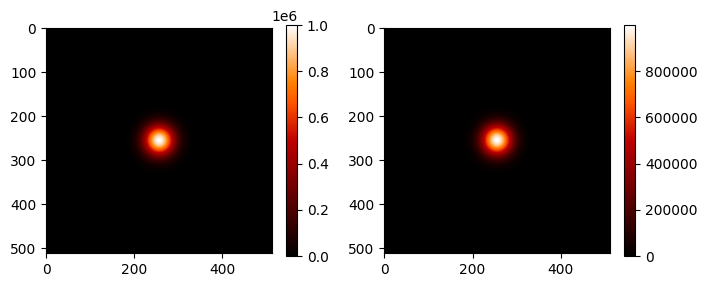

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in[0].field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_in[0])**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

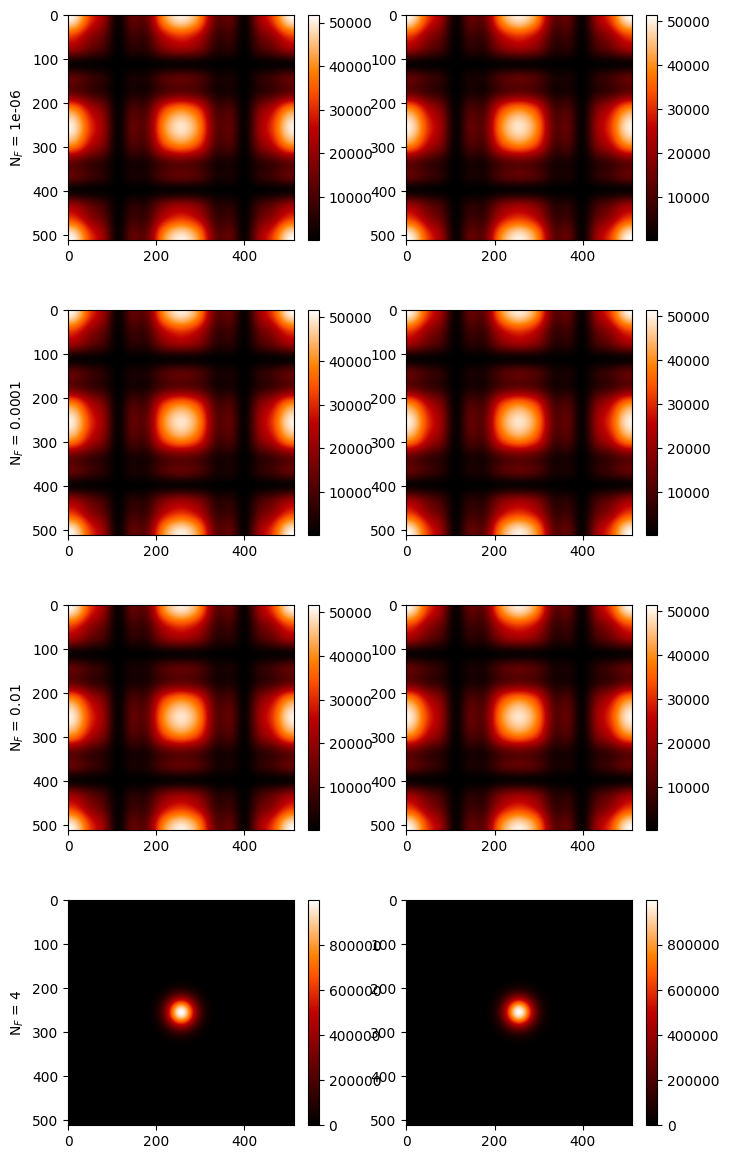

In [32]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.abs(F_out[i].field)**2, cmap='gist_heat')
    im2=ax[i][1].imshow(np.abs(E_out[i])**2, cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

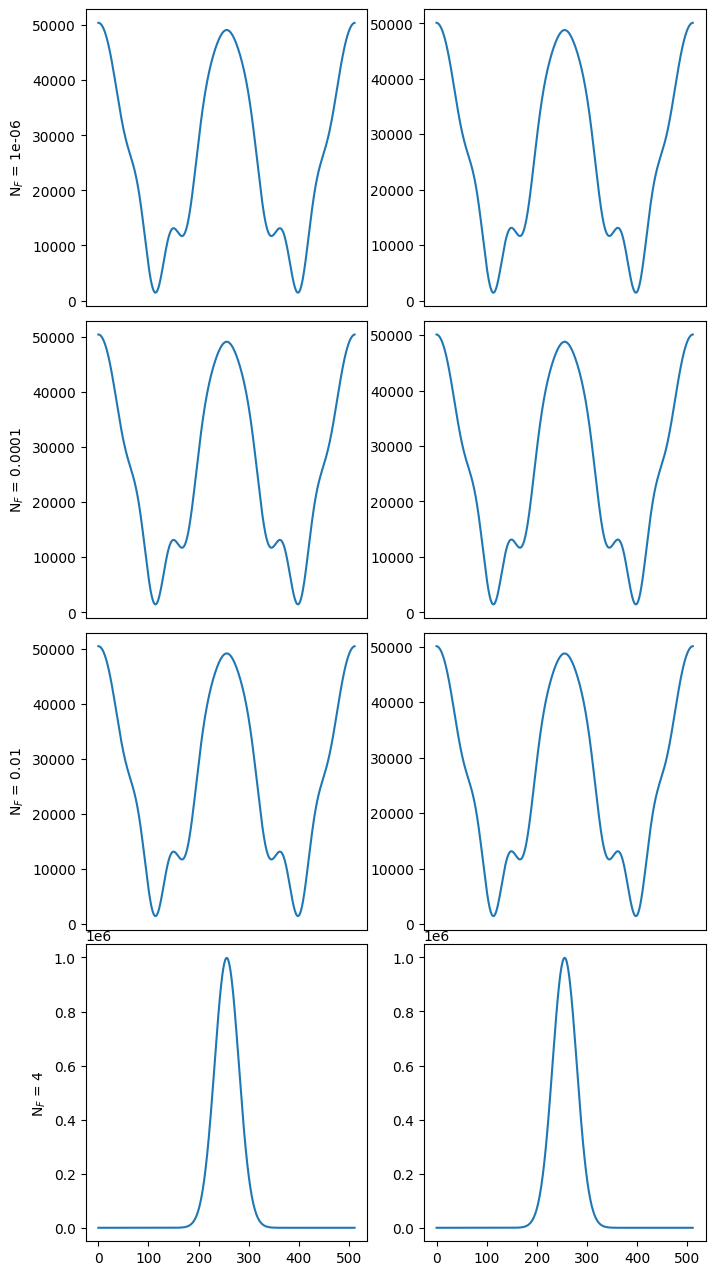

In [33]:
# cross section plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    ax[i][0].plot(np.abs(F_out[i].field[int(len(F_out[i].field)/2)])**2)
    ax[i][1].plot(np.abs(E_out[i][int(len(E_out[i])/2)])**2)
    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])
ax[1][0].set_xticklabels([])
ax[1][1].set_xticklabels([])
ax[2][0].set_xticklabels([])
ax[2][1].set_xticklabels([])

ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[2][0].set_xticks([])
ax[2][1].set_xticks([])

fig.subplots_adjust(hspace=0.05)

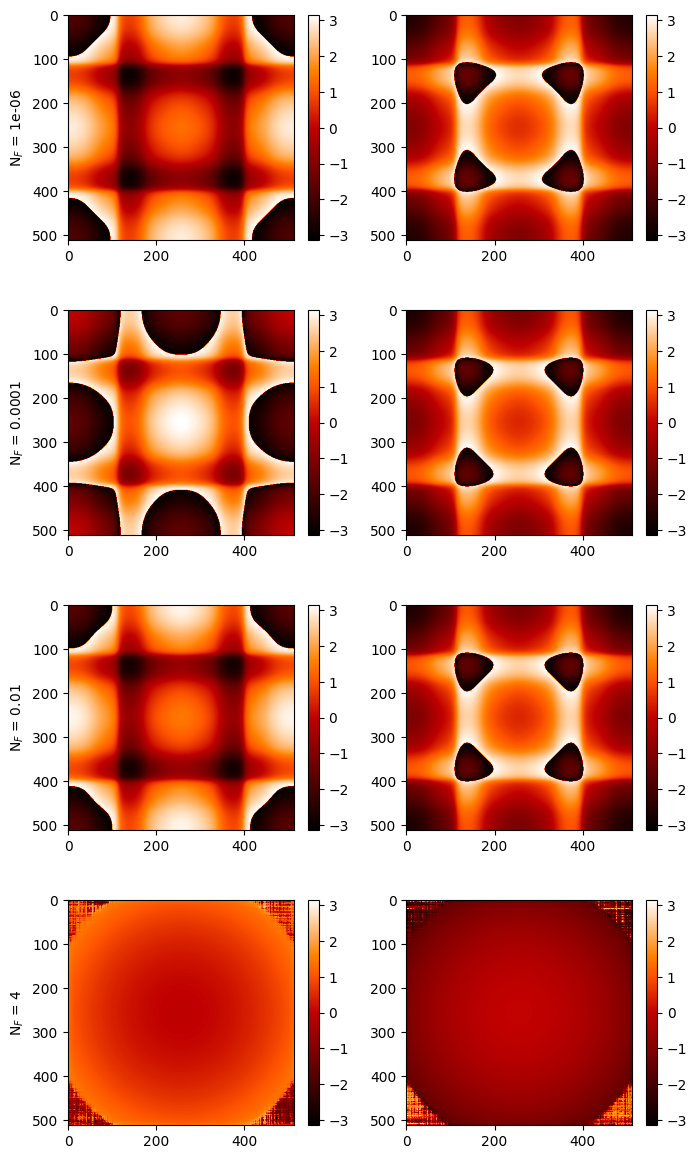

In [34]:
# intensity plots

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,4*4))

for i in range(len(E_out)):
    im1=ax[i][0].imshow(np.angle(F_out[i].field), cmap='gist_heat')
    im2=ax[i][1].imshow(np.angle(E_out[i]), cmap='gist_heat')

    fig.colorbar(im1, ax=ax[i][0], shrink=0.65)
    fig.colorbar(im2, ax=ax[i][1], shrink=0.65)

    ax[i][0].set_ylabel(f"N$_F$ = {N_F[i]}")

fig.subplots_adjust(hspace=-0.15)

In [35]:
# numerical comparison on number of photons

print("LightPipes comparison:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(F_in[i].field)**2), "| out =", np.sum(np.abs(F_out[i].field)**2))

print("\nCustom method:")

for i in range(len(N_F)):
    print("N_F =", N_F[i], "| in =", np.sum(np.abs(E_in[i])**2), "| out =", np.sum(np.abs(E_out[i])**2))

LightPipes comparison:
N_F = 1e-06 | in = 3660220731.478412 | out = 3660220731.4784136
N_F = 0.0001 | in = 3660220731.478412 | out = 3660220731.478413
N_F = 0.01 | in = 3660220731.478412 | out = 3660220731.4784136
N_F = 4 | in = 3660220731.478412 | out = 3660220731.478414

Custom method:
N_F = 1e-06 | in = 3645936956.880091 | out = 3645936956.880093
N_F = 0.0001 | in = 3645936956.880091 | out = 3645936956.880092
N_F = 0.01 | in = 3645936956.880091 | out = 3645936956.8800926
N_F = 4 | in = 3645936956.880091 | out = 3645936956.880092
